In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sea
import warnings
import datetime as dt
from sklearn.impute import SimpleImputer as skimpute
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer as Discretizer

In [266]:
dataFrame = pd.read_csv("marketing_campaign_data_updated.csv", sep = ",")

In [267]:
dataFrame.head()

Id  YearOfBirth EducationLevel MartialStatus    Income  NumberOfChildren  \
0   1         1978       Graduate       Widowed  39746.09                 0   
1   2         1991            PhD       Married  60643.00                 4   
2   3         1968    High School       Married  46829.96                 3   
3   4         1954          Basic      Divorced  48238.99                 0   
4   5         1982       Graduate       Married  49592.62                 0   

   NumberOfTeens DateTimeOfBecomingCustomer  Recency  NumberOfWineProducts  \
0              1              5/22/19 11:30       41                   501   
1              2              7/28/23 17:16       72                   407   
2              2             10/27/22 23:36       92                    94   
3              0               2/7/14 15:07       74                   125   
4              2              4/21/14 15:48       17                   501   

   NumberOfFruitProducts  NumberOfMeatProducts  NumberOfFishProducts  \
0                     23                   115                     0   
1                     52                   298                    17   
2                     47                     0                    33   
3                     17                    92                    50   
4                     12                   206                    25   

   NumberOfSweetProducts  NumberOfGoldProducts  NumberOfDealPurchases  \
0                     53                    88                      9   
1                     53                    88                      5   
2                     27                     0                      6   
3                     13                    44                      0   
4                     40                    44                      5   

   NumberOfWebPurchases  NumberOfCatalogPurchases  NumberOfInStorePurchases  \
0                    10                         5                        17   
1                     4                         1                         1   
2                    14                         3                        19   
3                     9                         8                        14   
4                    13                         3                        16   

   NumberOfWebVisitsPerMonth  AcceptedCampaign1  AcceptedCampaign2  \
0                          0                  0                  0   
1                          9                  0                  1   
2                          7                  0                  1   
3                          5                  1                  1   
4                          2                  0                  0   

   AcceptedCampaign3  AcceptedCampaign4  AcceptedCampaign5  \
0                  1                  0                  1   
1                  0                  0                  1   
2                  1                  1                  0   
3                  1                  1                  0   
4                  1                  0                  1   

   NumberOfComplaints  ResponseToCampaign  
0                   0                   0  
1                   1                   0  
2                   2                   0  
3                   1                   1  
4                   3                   1

In [268]:
dataFrame.shape

(1000, 27)

In [269]:
pd.set_option("display.max_columns", None)

In [270]:
warnings.filterwarnings("ignore")

In [271]:
dataFrame = dataFrame.drop(["Id"], axis = 1)

In [272]:
dataFrame.shape

(1000, 26)

In [273]:
y = dataFrame[["ResponseToCampaign"]]
x = dataFrame.drop(["ResponseToCampaign"], axis = 1)

In [274]:
y.shape

(1000, 1)

In [275]:
x.shape

(1000, 25)

In [276]:
y.mean()

ResponseToCampaign    0.489
dtype: float64

In [277]:
reference_date = dt.datetime(2024, 5, 1)
print(reference_date)

2024-05-01 00:00:00


In [278]:
#convert year of birth to age, convert dt customer to time span of user being registered customer
x["YearOfBirth"] = pd.to_datetime(dataFrame["YearOfBirth"], format="%Y")
x["Age"] = round((reference_date - x["YearOfBirth"]).dt.days / 365, 0)
x["DateTimeOfBecomingCustomer"] = pd.to_datetime(x["DateTimeOfBecomingCustomer"])
x["Customer_Tenure"] = round((reference_date - x["DateTimeOfBecomingCustomer"]).dt.days / 365, 0)

#x = x.drop(["Year_Birth", "Dt_Customer"], axis = 1)

In [279]:
x[["Age", "Customer_Tenure"]].head()

Age  Customer_Tenure
0  46.0              5.0
1  33.0              1.0
2  56.0              2.0
3  70.0             10.0
4  42.0             10.0

In [280]:
x = x.drop(["YearOfBirth", "DateTimeOfBecomingCustomer"], axis = 1)

In [281]:
dataFrame.dtypes

YearOfBirth                     int64
EducationLevel                 object
MartialStatus                  object
Income                        float64
NumberOfChildren                int64
NumberOfTeens                   int64
DateTimeOfBecomingCustomer     object
Recency                         int64
NumberOfWineProducts            int64
NumberOfFruitProducts           int64
NumberOfMeatProducts            int64
NumberOfFishProducts            int64
NumberOfSweetProducts           int64
NumberOfGoldProducts            int64
NumberOfDealPurchases           int64
NumberOfWebPurchases            int64
NumberOfCatalogPurchases        int64
NumberOfInStorePurchases        int64
NumberOfWebVisitsPerMonth       int64
AcceptedCampaign1               int64
AcceptedCampaign2               int64
AcceptedCampaign3               int64
AcceptedCampaign4               int64
AcceptedCampaign5               int64
NumberOfComplaints              int64
ResponseToCampaign              int64
dtype: objec

In [282]:
#split features to categorical and numerical
numerical = x.select_dtypes(include = "number")
categorical = x.select_dtypes(include = "object")

In [283]:
def uniqueness(x):
    x = x.value_counts().count()
    return x
df_value_counts = pd.DataFrame(numerical.apply(lambda x: uniqueness(x)))

In [284]:
df_value_counts.columns = ["feature_levels"]

In [285]:
df_value_counts.head()

feature_levels
Income                           997
NumberOfChildren                   5
NumberOfTeens                      3
Recency                          100
NumberOfWineProducts             198

In [286]:
featuresWithLessThan20levels = df_value_counts.loc[df_value_counts["feature_levels"] <= 20]
categorical_list = featuresWithLessThan20levels.index
categorical_features_from_numerical = numerical.loc[:, categorical_list]
categorical_features_from_numerical.dtypes

NumberOfChildren               int64
NumberOfTeens                  int64
NumberOfDealPurchases          int64
NumberOfWebPurchases           int64
NumberOfCatalogPurchases       int64
NumberOfInStorePurchases       int64
NumberOfWebVisitsPerMonth      int64
AcceptedCampaign1              int64
AcceptedCampaign2              int64
AcceptedCampaign3              int64
AcceptedCampaign4              int64
AcceptedCampaign5              int64
NumberOfComplaints             int64
Customer_Tenure              float64
dtype: object

In [287]:
def convert_type(x, convert_to_type):
    x = x.astype(convert_to_type)
    return x
categorical_features_from_numerical = categorical_features_from_numerical.apply(lambda x : convert_type(x, "object"))
categorical_features_from_numerical.dtypes

NumberOfChildren             object
NumberOfTeens                object
NumberOfDealPurchases        object
NumberOfWebPurchases         object
NumberOfCatalogPurchases     object
NumberOfInStorePurchases     object
NumberOfWebVisitsPerMonth    object
AcceptedCampaign1            object
AcceptedCampaign2            object
AcceptedCampaign3            object
AcceptedCampaign4            object
AcceptedCampaign5            object
NumberOfComplaints           object
Customer_Tenure              object
dtype: object

In [288]:
featuresWithMoreThan20levels = df_value_counts.loc[df_value_counts["feature_levels"] > 20]
numerical_list = featuresWithMoreThan20levels.index
numerical = numerical.loc[:, numerical_list]

In [289]:
categorical = pd.concat([categorical, categorical_features_from_numerical], axis = 1, join = "inner")

In [290]:
numerical.shape

(1000, 9)

In [291]:
categorical.shape

(1000, 16)

In [292]:
def cap_outliers(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x
numerical = numerical.apply(lambda x: cap_outliers(x))

In [293]:
numerical.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.9, 0.99])

Income      Recency  NumberOfWineProducts  NumberOfFruitProducts  \
count   1000.000000  1000.000000           1000.000000            1000.000000   
mean   50510.257162    49.353000            304.988500              25.184600   
std    14290.843775    28.620054            230.129993              24.132383   
min    16636.739600     1.000000              0.000000               0.000000   
1%     16645.729196     1.000000              0.000000               0.000000   
5%     27831.325500     6.000000              1.000000               0.000000   
10%    32150.363000    11.000000             11.000000               0.000000   
25%    40482.737500    24.000000             94.000000               6.000000   
50%    50710.870000    49.000000            308.500000              22.000000   
75%    60263.082500    74.000000            469.000000              41.000000   
85%    65853.989500    83.150000            532.000000              47.000000   
90%    69342.250000    89.000000            583.400000              52.000000   
99%    83851.302246    98.000000           1043.000500             138.000600   
max    83854.494600    98.000000           1043.050000             138.060000   

       NumberOfMeatProducts  NumberOfFishProducts  NumberOfSweetProducts  \
count           1000.000000           1000.000000             1000.00000   
mean             162.730400             36.905600               26.56320   
std              131.570426             33.273155               26.49676   
min                0.000000              0.000000                0.00000   
1%                 0.000000              0.000000                0.00000   
5%                 2.000000              0.000000                0.00000   
10%               10.000000              0.000000                0.00000   
25%               46.000000              8.000000                4.00000   
50%              140.000000             33.000000               27.00000   
75%              252.000000             59.000000               40.00000   
85%              297.150000             67.000000               53.00000   
90%              321.000000             75.000000               53.00000   
99%              716.002400            180.000600              147.00020   
max              716.240000            180.060000              147.02000   

       NumberOfGoldProducts          Age  
count           1000.000000  1000.000000  
mean              42.801100    52.143000  
std               39.358075    18.114267  
min                0.000000    23.000000  
1%                 0.000000    23.000000  
5%                 0.000000    25.000000  
10%                0.000000    27.000000  
25%                2.000000    36.000000  
50%               44.000000    52.000000  
75%               88.000000    67.000000  
85%               88.000000    74.000000  
90%               88.000000    78.000000  
99%              181.000100    84.000000  
max              181.010000    84.000000

In [294]:
#check missing val
numerical.isnull().mean()

Income                   0.0
Recency                  0.0
NumberOfWineProducts     0.0
NumberOfFruitProducts    0.0
NumberOfMeatProducts     0.0
NumberOfFishProducts     0.0
NumberOfSweetProducts    0.0
NumberOfGoldProducts     0.0
Age                      0.0
dtype: float64

In [295]:
imputer = skimpute(missing_values = np.nan, strategy="mean")
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), index = numerical.index, columns = numerical.columns)

In [296]:
numerical_imputed.isnull().mean()

Income                   0.0
Recency                  0.0
NumberOfWineProducts     0.0
NumberOfFruitProducts    0.0
NumberOfMeatProducts     0.0
NumberOfFishProducts     0.0
NumberOfSweetProducts    0.0
NumberOfGoldProducts     0.0
Age                      0.0
dtype: float64

In [297]:
#check missing values for categorical
categorical.isnull().mean()

EducationLevel               0.0
MartialStatus                0.0
NumberOfChildren             0.0
NumberOfTeens                0.0
NumberOfDealPurchases        0.0
NumberOfWebPurchases         0.0
NumberOfCatalogPurchases     0.0
NumberOfInStorePurchases     0.0
NumberOfWebVisitsPerMonth    0.0
AcceptedCampaign1            0.0
AcceptedCampaign2            0.0
AcceptedCampaign3            0.0
AcceptedCampaign4            0.0
AcceptedCampaign5            0.0
NumberOfComplaints           0.0
Customer_Tenure              0.0
dtype: float64

In [298]:
#check variance
variance = VarianceThreshold(threshold=0)
variance.fit_transform(numerical_imputed)
affected_columns = variance.get_support(indices = True)
numerical_imputed_variance_checked = numerical_imputed.iloc[:, affected_columns]

In [299]:
numerical_imputed_variance_checked.head()

Income  Recency  NumberOfWineProducts  NumberOfFruitProducts  \
0  39746.09     41.0                 501.0                   23.0   
1  60643.00     72.0                 407.0                   52.0   
2  46829.96     92.0                  94.0                   47.0   
3  48238.99     74.0                 125.0                   17.0   
4  49592.62     17.0                 501.0                   12.0   

   NumberOfMeatProducts  NumberOfFishProducts  NumberOfSweetProducts  \
0                 115.0                   0.0                   53.0   
1                 298.0                  17.0                   53.0   
2                   0.0                  33.0                   27.0   
3                  92.0                  50.0                   13.0   
4                 206.0                  25.0                   40.0   

   NumberOfGoldProducts   Age  
0                  88.0  46.0  
1                  88.0  33.0  
2                   0.0  56.0  
3                  44.0  70.0  
4                  44.0  42.0

In [300]:
#feature discretization
discretizer = Discretizer(n_bins=10, encode = "ordinal", strategy = "quantile")
numerical_binned = pd.DataFrame(discretizer.fit_transform(numerical_imputed_variance_checked), index = numerical_imputed_variance_checked.index, columns = numerical_imputed_variance_checked.columns).add_suffix("_Discrete")
numerical_binned.head()

Income_Discrete  Recency_Discrete  NumberOfWineProducts_Discrete  \
0              2.0               4.0                            8.0   
1              7.0               7.0                            6.0   
2              4.0               9.0                            2.0   
3              4.0               7.0                            2.0   
4              4.0               1.0                            8.0   

   NumberOfFruitProducts_Discrete  NumberOfMeatProducts_Discrete  \
0                             4.0                            4.0   
1                             8.0                            8.0   
2                             7.0                            0.0   
3                             3.0                            3.0   
4                             3.0                            6.0   

   NumberOfFishProducts_Discrete  NumberOfSweetProducts_Discrete  \
0                            0.0                             7.0   
1                            2.0                             7.0   
2                            4.0                             4.0   
3                            6.0                             3.0   
4                            3.0                             5.0   

   NumberOfGoldProducts_Discrete  Age_Discrete  
0                            4.0           4.0  
1                            4.0           2.0  
2                            0.0           5.0  
3                            3.0           7.0  
4                            3.0           3.0

In [301]:
x_binned_combined = pd.concat([y, numerical_binned], axis = 1, join = "inner")

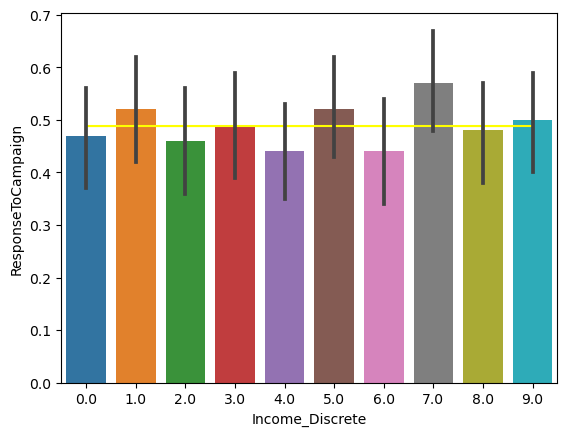

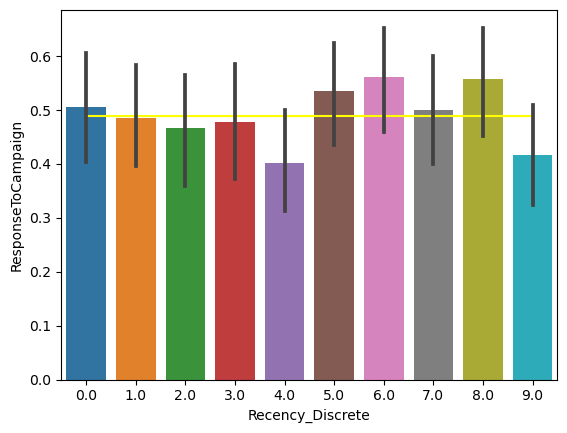

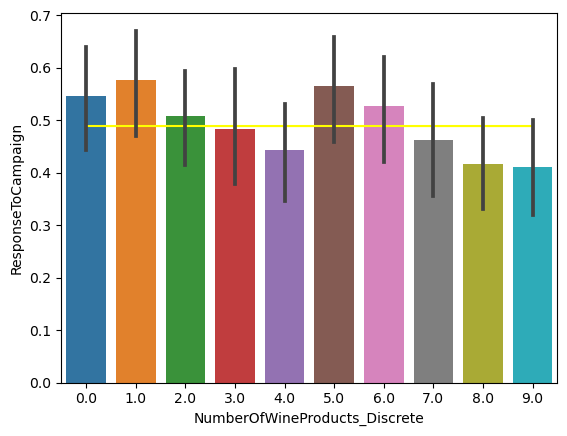

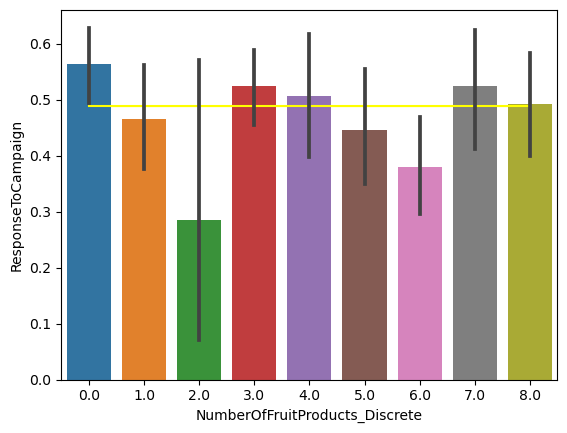

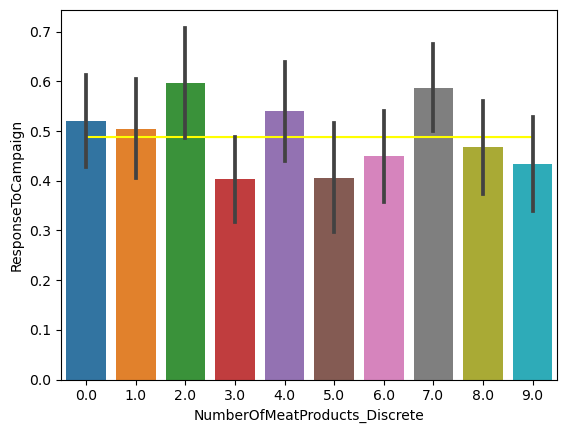

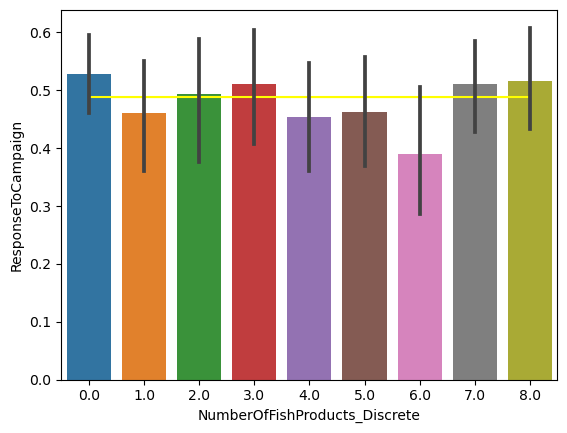

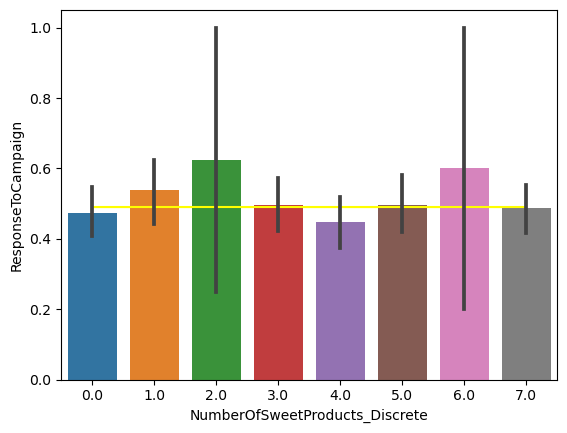

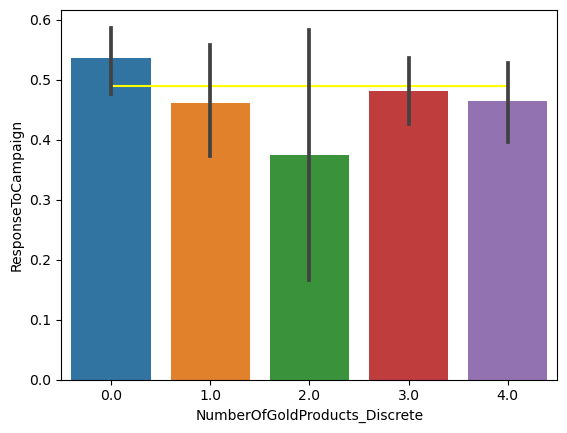

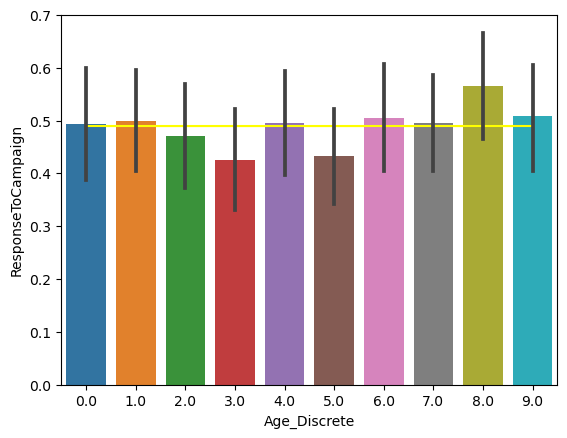

In [302]:
#check correlation for every col regarding to target var
from numpy import mean
for column in numerical_binned.columns:
    mpl.figure()
    sea.lineplot(x = column, y = x_binned_combined["ResponseToCampaign"].mean(), data = x_binned_combined, color="yellow")
    sea.barplot(x = column, y = "ResponseToCampaign", data = x_binned_combined, estimator = mean)
mpl.show()

In [303]:
numerical_imputed_variance_checked = numerical_imputed_variance_checked.drop(["Age"], axis = 1)
numerical_imputed_variance_checked.shape

(1000, 8)

In [304]:
numerical_imputed_variance_checked.head()

Income  Recency  NumberOfWineProducts  NumberOfFruitProducts  \
0  39746.09     41.0                 501.0                   23.0   
1  60643.00     72.0                 407.0                   52.0   
2  46829.96     92.0                  94.0                   47.0   
3  48238.99     74.0                 125.0                   17.0   
4  49592.62     17.0                 501.0                   12.0   

   NumberOfMeatProducts  NumberOfFishProducts  NumberOfSweetProducts  \
0                 115.0                   0.0                   53.0   
1                 298.0                  17.0                   53.0   
2                   0.0                  33.0                   27.0   
3                  92.0                  50.0                   13.0   
4                 206.0                  25.0                   40.0   

   NumberOfGoldProducts  
0                  88.0  
1                  88.0  
2                   0.0  
3                  44.0  
4                  44.0

In [305]:
#select 6 best features
selector = SelectKBest(chi2, k = 6)
selector.fit_transform(numerical_imputed_variance_checked, y)
columns = selector.get_support(indices = True)
selected_numerical_features = numerical_imputed.iloc[:, columns]
selected_numerical_features.iloc[0]

Income                   39746.09
Recency                     41.00
NumberOfWineProducts       501.00
NumberOfFruitProducts       23.00
NumberOfMeatProducts       115.00
NumberOfGoldProducts        88.00
Name: 0, dtype: float64

In [306]:
#categorical features selection
categorical_features_uniqueness = pd.DataFrame(categorical.apply(lambda x: uniqueness(x)))

In [307]:
categorical_features_uniqueness

0
EducationLevel              5
MartialStatus               4
NumberOfChildren            5
NumberOfTeens               3
NumberOfDealPurchases      13
NumberOfWebPurchases       15
NumberOfCatalogPurchases   12
NumberOfInStorePurchases   20
NumberOfWebVisitsPerMonth  10
AcceptedCampaign1           2
AcceptedCampaign2           2
AcceptedCampaign3           2
AcceptedCampaign4           2
AcceptedCampaign5           2
NumberOfComplaints          5
Customer_Tenure            15

In [308]:
categorical_features_uniqueness.columns=["feature_levels"]
categorical_features_uniqueness_slice = categorical_features_uniqueness.loc[categorical_features_uniqueness["feature_levels"] > 1]
sliced_list = categorical_features_uniqueness_slice.index
categorical = categorical.loc[:, sliced_list]

In [309]:
categorical

EducationLevel MartialStatus NumberOfChildren NumberOfTeens  \
0         Graduate       Widowed                0             1   
1              PhD       Married                4             2   
2      High School       Married                3             2   
3            Basic      Divorced                0             0   
4         Graduate       Married                0             2   
..             ...           ...              ...           ...   
995   Postgraduate       Widowed                2             2   
996    High School       Widowed                4             2   
997    High School       Widowed                2             0   
998       Graduate        Single                0             2   
999          Basic      Divorced                3             1   

    NumberOfDealPurchases NumberOfWebPurchases NumberOfCatalogPurchases  \
0                       9                   10                        5   
1                       5                    4                        1   
2                       6                   14                        3   
3                       0                    9                        8   
4                       5                   13                        3   
..                    ...                  ...                      ...   
995                     8                    2                        8   
996                     2                   11                        7   
997                     0                    7                        7   
998                     1                    4                        2   
999                     0                    7                        3   

    NumberOfInStorePurchases NumberOfWebVisitsPerMonth AcceptedCampaign1  \
0                         17                         0                 0   
1                          1                         9                 0   
2                         19                         7                 0   
3                         14                         5                 1   
4                         16                         2                 0   
..                       ...                       ...               ...   
995                        0                         1                 1   
996                        5                         9                 0   
997                       10                         1                 1   
998                       12                         3                 0   
999                       19                         3                 0   

    AcceptedCampaign2 AcceptedCampaign3 AcceptedCampaign4 AcceptedCampaign5  \
0                   0                 1                 0                 1   
1                   1                 0                 0                 1   
2                   1                 1                 1                 0   
3                   1                 1                 1                 0   
4                   0                 1                 0                 1   
..                ...               ...               ...               ...   
995                 0                 0                 1                 0   
996                 1                 1                 1                 0   
997                 0                 1                 1                 0   
998                 1                 1                 1                 0   
999                 1                 1                 1                 1   

    NumberOfComplaints Customer_Tenure  
0                    0             5.0  
1                    1             1.0  
2                    2             2.0  
3                    1            10.0  
4                    3            10.0  
..                 ...             ...  
995                  2            12.0  
996                  0            11.0  
997                  2             9.0  
998                  4    

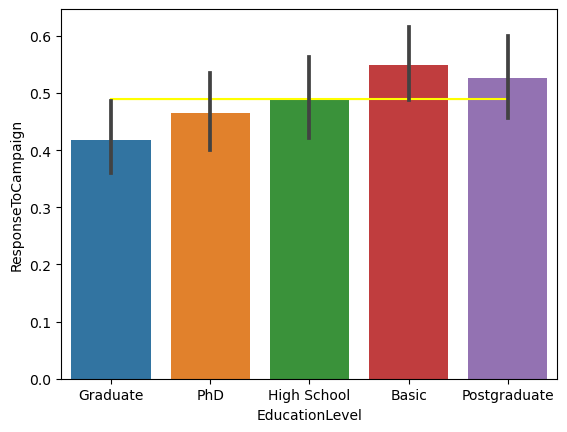

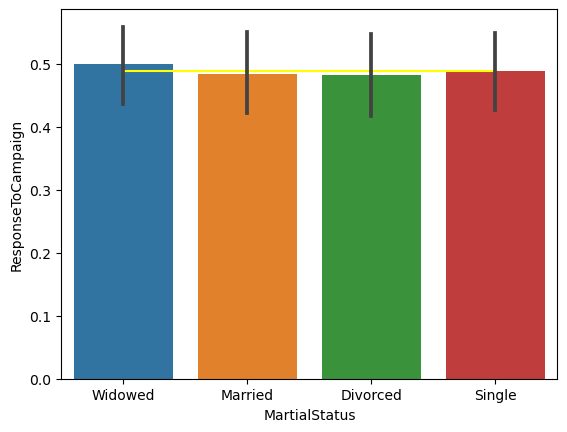

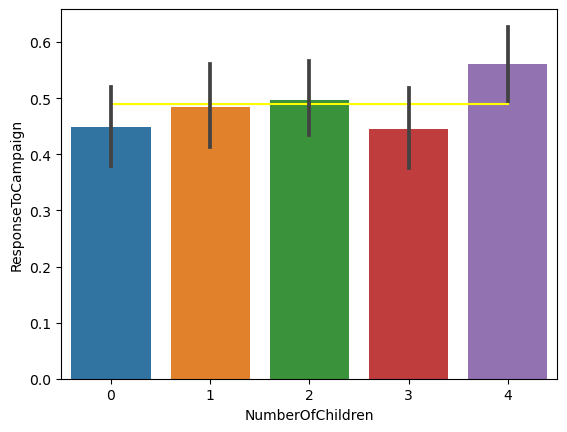

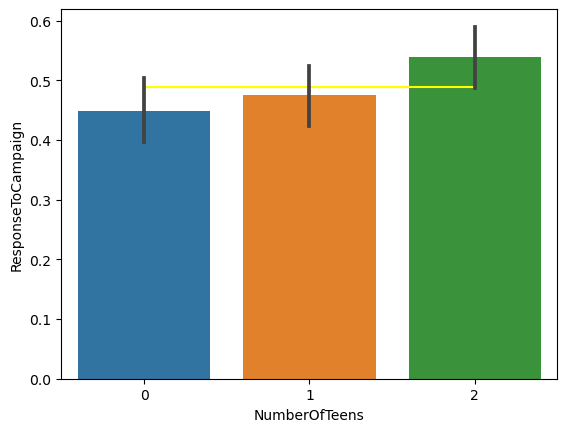

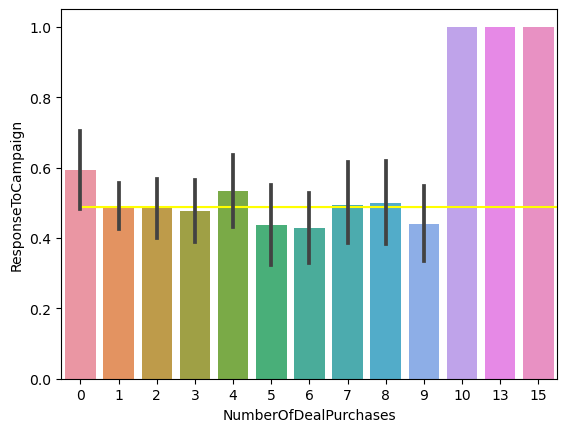

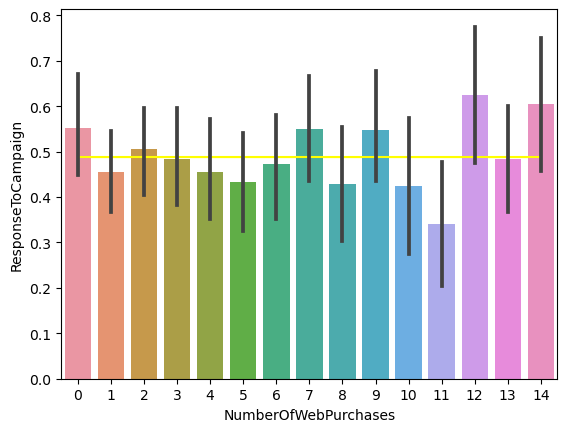

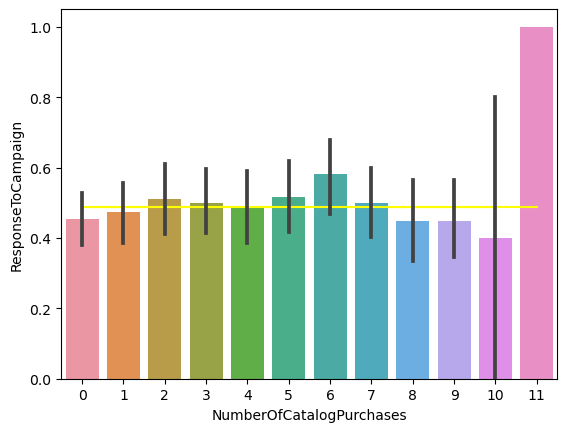

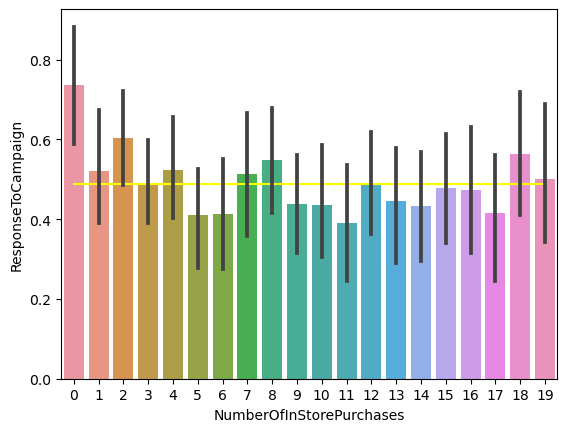

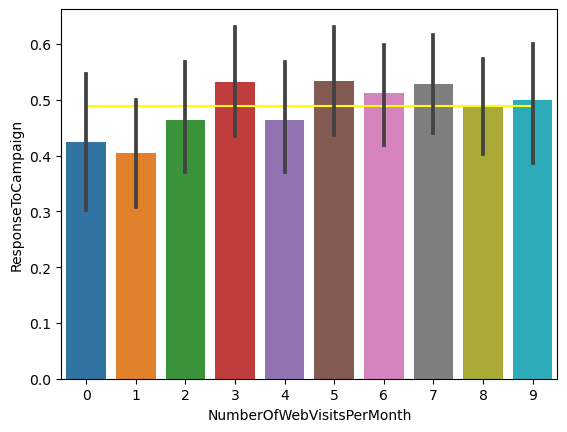

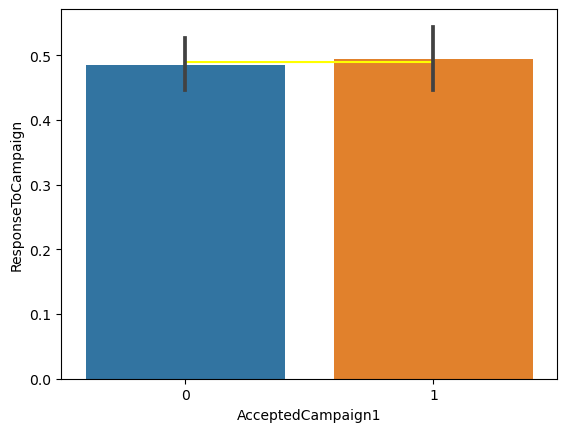

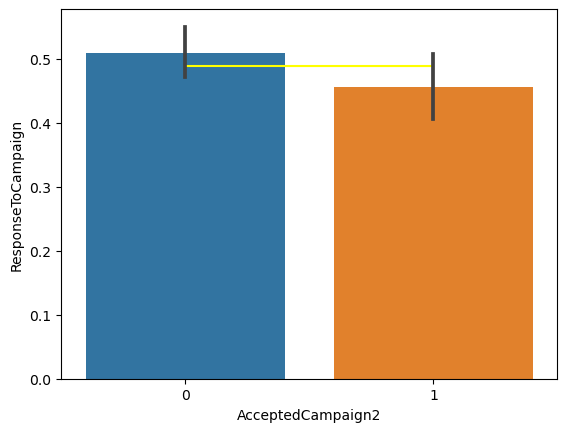

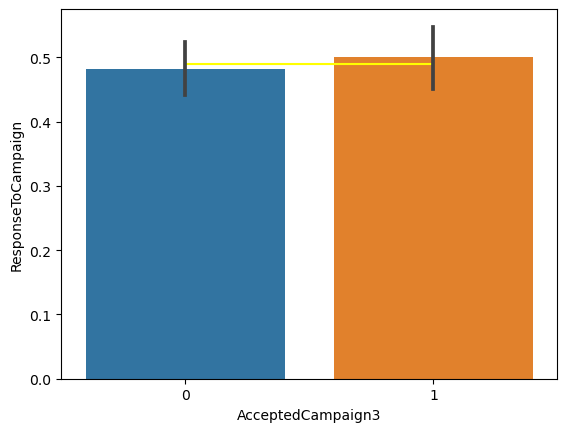

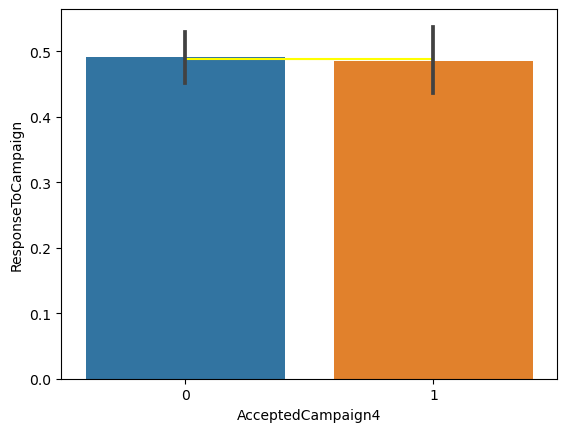

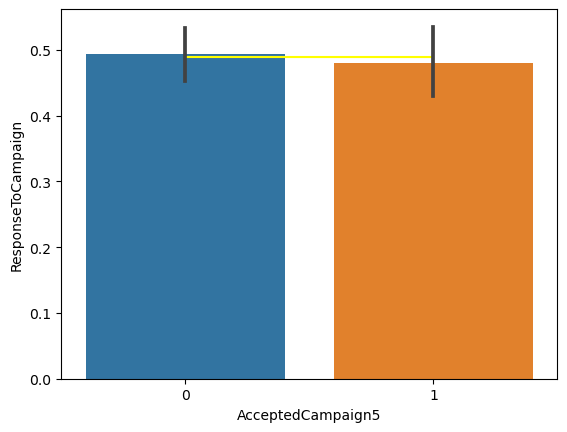

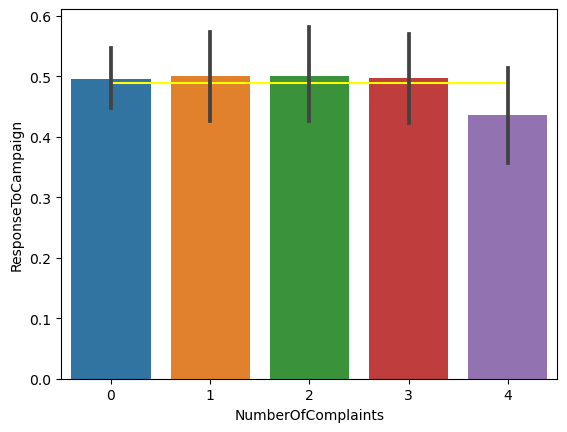

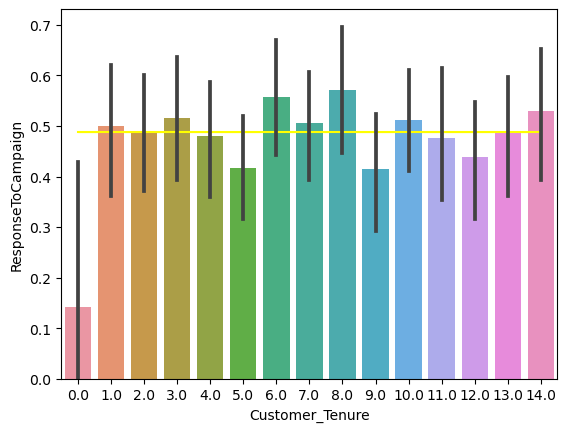

In [310]:
#check correlation for every col regarding to target var
x_categorical_merged = pd.concat([y, categorical], axis = 1, join = "inner")

from numpy import mean
for col in categorical.columns:
    mpl.figure()
    sea.lineplot(x = col, y = x_categorical_merged["ResponseToCampaign"].mean(), data = x_categorical_merged, color = "yellow")
    sea.barplot(x = col, y = "ResponseToCampaign", data = x_categorical_merged, estimator = mean)
mpl.show()

In [311]:
categorical_list_drop = ["EducationLevel", "NumberOfInStorePurchases", "NumberOfComplaints"]
categorical = categorical.drop(categorical_list_drop, axis = 1)
categorical.shape

(1000, 13)

In [312]:
#creating dummy features (n-1), decompose to simple col values
x_categorical_dummies = pd.get_dummies(categorical, drop_first = True)
x_categorical_dummies.shape

(1000, 74)

In [313]:
x_categorical_dummies.head()

MartialStatus_Married  MartialStatus_Single  MartialStatus_Widowed  \
0                  False                 False                   True   
1                   True                 False                  False   
2                   True                 False                  False   
3                  False                 False                  False   
4                   True                 False                  False   

   NumberOfChildren_1  NumberOfChildren_2  NumberOfChildren_3  \
0               False               False               False   
1               False               False               False   
2               False               False                True   
3               False               False               False   
4               False               False               False   

   NumberOfChildren_4  NumberOfTeens_1  NumberOfTeens_2  \
0               False             True            False   
1                True            False             True   
2               False            False             True   
3               False            False            False   
4               False            False             True   

   NumberOfDealPurchases_1  NumberOfDealPurchases_2  NumberOfDealPurchases_3  \
0                    False                    False                    False   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   NumberOfDealPurchases_4  NumberOfDealPurchases_5  NumberOfDealPurchases_6  \
0                    False                    False                    False   
1                    False                     True                    False   
2                    False                    False                     True   
3                    False                    False                    False   
4                    False                     True                    False   

   NumberOfDealPurchases_7  NumberOfDealPurchases_8  NumberOfDealPurchases_9  \
0                    False                    False                     True   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   NumberOfDealPurchases_10  NumberOfDealPurchases_13  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   NumberOfDealPurchases_15  NumberOfWebPurchases_1  NumberOfWebPurchases_2  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   

   NumberOfWebPurchases_3  NumberOfWebPurchases_4  NumberOfWebPurchases_5  \
0                   False                   False                   False   
1                   False                    True                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   NumberOfWebPurchases_6  NumberOfWebPurchases_7  NumberOfWebPurchases_8  \
0                

In [314]:
selector = SelectKBest(chi2, k = 70)
selector.fit_transform(x_categorical_dummies, y)

#get indexes of col to keep
columns = selector.get_support(indices = True)
selected_categorical_features = x_categorical_dummies.iloc[:, columns]

In [315]:
selected_categorical_features.dtypes

MartialStatus_Married    bool
MartialStatus_Widowed    bool
NumberOfChildren_1       bool
NumberOfChildren_2       bool
NumberOfChildren_3       bool
                         ... 
Customer_Tenure_10.0     bool
Customer_Tenure_11.0     bool
Customer_Tenure_12.0     bool
Customer_Tenure_13.0     bool
Customer_Tenure_14.0     bool
Length: 70, dtype: object

In [316]:
#join selected numerical and categorical features
x_all_features = pd.concat([selected_categorical_features, selected_numerical_features], axis = 1, join = "inner")

In [317]:
x_all_features.head()

MartialStatus_Married  MartialStatus_Widowed  NumberOfChildren_1  \
0                  False                   True               False   
1                   True                  False               False   
2                   True                  False               False   
3                  False                  False               False   
4                   True                  False               False   

   NumberOfChildren_2  NumberOfChildren_3  NumberOfChildren_4  \
0               False               False               False   
1               False               False                True   
2               False                True               False   
3               False               False               False   
4               False               False               False   

   NumberOfTeens_1  NumberOfTeens_2  NumberOfDealPurchases_3  \
0             True            False                    False   
1            False             True                    False   
2            False             True                    False   
3            False            False                    False   
4            False             True                    False   

   NumberOfDealPurchases_4  NumberOfDealPurchases_5  NumberOfDealPurchases_6  \
0                    False                    False                    False   
1                    False                     True                    False   
2                    False                    False                     True   
3                    False                    False                    False   
4                    False                     True                    False   

   NumberOfDealPurchases_7  NumberOfDealPurchases_8  NumberOfDealPurchases_9  \
0                    False                    False                     True   
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   

   NumberOfDealPurchases_10  NumberOfDealPurchases_13  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   NumberOfDealPurchases_15  NumberOfWebPurchases_1  NumberOfWebPurchases_2  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   

   NumberOfWebPurchases_3  NumberOfWebPurchases_4  NumberOfWebPurchases_5  \
0                   False                   False                   False   
1                   False                    True                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   NumberOfWebPurchases_6  NumberOfWebPurchases_7  NumberOfWebPurchases_8  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   NumberOfWebPurchases_9  NumberOfWebPurchases_10  NumberOfWebPurchases_11  \
0              

In [318]:
for column in x_all_features.columns:
    if x_all_features[column].dtype == 'float64':
        x_all_features[column] = x_all_features[column].astype(np.float32)

In [319]:
for column in x_all_features.columns:
    if x_all_features[column].dtype == 'bool':
        x_all_features[column] = x_all_features[column].astype(np.uint8)

In [320]:
x_all_features.dtypes

MartialStatus_Married      uint8
MartialStatus_Widowed      uint8
NumberOfChildren_1         uint8
NumberOfChildren_2         uint8
NumberOfChildren_3         uint8
                          ...   
Recency                  float32
NumberOfWineProducts     float32
NumberOfFruitProducts    float32
NumberOfMeatProducts     float32
NumberOfGoldProducts     float32
Length: 76, dtype: object

In [321]:
from varclushi import VarClusHi

var_clus = VarClusHi(x_all_features, maxeigval2=1, maxclus=None)
var_clus.varclus()

In [322]:
var_clus.info

Cluster N_Vars   Eigval1   Eigval2   VarProp
0        0      6  2.035643  0.989605  0.339274
1        1      4  1.595284  0.845391  0.398821
2        2      2  1.511458  0.488542  0.755729
3        3      2  1.250723  0.749277  0.625361
4        4      4  1.230809  0.993622  0.307702
5        5      2  1.342280  0.657720  0.671140
6        6      5  1.196295  0.997658  0.239259
7        7      4  1.143946  0.990757  0.285987
8        8      2  1.123349  0.876651  0.561674
9        9      3  1.148622  0.993293  0.382874
10      10      3  1.114019  0.988083  0.371340
11      11      4  1.178214  0.985904  0.294553
12      12      3  1.207565  0.955764  0.402522
13      13      2  1.109094  0.890906  0.554547
14      14      3  1.133452  0.994989  0.377817
15      15      3  1.148804  0.951549  0.382935
16      16      3  1.097122  0.968773  0.365707
17      17      2  1.081184  0.918816  0.540592
18      18      3  1.085087  0.993393  0.361696
19      19      1  1.000000  0.000000  1.000000
20      20      1  1.000000  0.000000  1.000000
21      21      2  1.039934  0.960066  0.519967
22      22      2  1.078165  0.921835  0.539083
23      23      2  1.077854  0.922146  0.538927
24      24      2  1.028934  0.971066  0.514467
25      25      1  1.000000  0.000000  1.000000
26      26      2  1.100627  0.899373  0.550313
27      27      1  1.000000  0.000000  1.000000
28      28      2  1.056546  0.943454  0.528273

In [323]:
check_clusters = var_clus.rsquare
check_clusters

Cluster                     Variable    RS_Own     RS_NC      RS_Ratio
0         0       NumberOfWebPurchases_1  0.214688  0.035084  8.138654e-01
1         0         NumberOfWineProducts  0.402738  0.023504  6.116378e-01
2         0        NumberOfFruitProducts  0.448095  0.023015  5.649061e-01
3         0         NumberOfMeatProducts  0.549424  0.075541  4.873946e-01
4         0         NumberOfGoldProducts  0.341894  0.006139  6.621716e-01
..      ...                          ...       ...       ...           ...
71       26          AcceptedCampaign1_1  0.550313  0.040023  4.684351e-01
72       26      NumberOfWebPurchases_14  0.550313  0.007454  4.530637e-01
73       27  NumberOfWebVisitsPerMonth_9  1.000000  0.010602  2.244240e-16
74       28   NumberOfCatalogPurchases_7  0.528273  0.014634  4.787331e-01
75       28      NumberOfDealPurchases_6  0.528273  0.006184  4.746623e-01

[76 rows x 5 columns]

In [324]:
filtered = check_clusters[check_clusters["RS_Ratio"] <= 0.5]
filtered.shape

(34, 5)

In [325]:
filtered.head()

Cluster              Variable    RS_Own     RS_NC  RS_Ratio
3         0  NumberOfMeatProducts  0.549424  0.075541  0.487395
10        2       NumberOfTeens_1  0.755729  0.006085  0.245766
11        2       NumberOfTeens_2  0.755729  0.010204  0.246789
12        3    NumberOfChildren_2  0.625361  0.016213  0.380813
13        3    NumberOfChildren_1  0.625361  0.025158  0.384307

In [326]:
final_features = filtered["Variable"]
x_all_features = x_all_features[final_features]
x_all_features.shape

(1000, 34)

In [327]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all_features, y, test_size = 0.3, random_state = 20)

In [328]:
x_train.shape

(700, 34)

In [329]:
x_test.shape

(300, 34)

In [330]:
#logic regression model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(random_state = 20)
log_regression.fit(x_train, y_train)

LogisticRegression(random_state=20)

In [331]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state = 20)

In [332]:
#determine best parameters for tree
from sklearn.model_selection import GridSearchCV
param_options = { "max_depth" : [3, 5, 6, 7], "min_samples_split" : [75, 100, 125, 150] }
grid_search = GridSearchCV(tree, cv = 10, param_grid = param_options, n_jobs = 3)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 6, 'min_samples_split': 125}

In [333]:
tree = DecisionTreeClassifier(criterion = "gini", random_state = 20, max_depth = 3, min_samples_split = 125)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=125, random_state=20)

In [334]:
#random tree forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(criterion = "gini", random_state = 20, max_depth = 3, min_samples_split = 125)
rand_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=125, random_state=20)

In [335]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(criterion = "friedman_mse", random_state = 20, max_depth = 3, min_samples_split = 125)
grad_boost.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_split=125, random_state=20)

In [336]:
from sklearn import metrics
y_predict_logistic_regression = log_regression.predict(x_test)
y_predict_tree = tree.predict(x_test)
y_predict_rand_forest = rand_forest.predict(x_test)
y_predict_grad_boost = grad_boost.predict(x_test)

In [337]:
print("Logistic reg accuracy", metrics.accuracy_score(y_test, y_predict_logistic_regression))
print("Logistic reg precision", metrics.precision_score(y_test, y_predict_logistic_regression))
print("Logistic reg recall score", metrics.recall_score(y_test, y_predict_logistic_regression))
print("Logistic reg f1 score", metrics.f1_score(y_test, y_predict_logistic_regression))

Logistic reg accuracy 0.5033333333333333
Logistic reg precision 0.5080645161290323
Logistic reg recall score 0.41721854304635764
Logistic reg f1 score 0.4581818181818182


In [338]:
print("Tree accuracy", metrics.accuracy_score(y_test, y_predict_tree))
print("Tree precision", metrics.precision_score(y_test, y_predict_tree))
print("Tree recall score", metrics.recall_score(y_test, y_predict_tree))
print("Tree f1 score", metrics.f1_score(y_test, y_predict_tree))

Tree accuracy 0.49
Tree precision 0.46153846153846156
Tree recall score 0.07947019867549669
Tree f1 score 0.13559322033898308


In [339]:
print("rand_forest accuracy", metrics.accuracy_score(y_test, y_predict_rand_forest))
print("rand_forest precision", metrics.precision_score(y_test, y_predict_rand_forest))
print("rand_forest recall score", metrics.recall_score(y_test, y_predict_rand_forest))
print("rand_forest f1 score", metrics.f1_score(y_test, y_predict_rand_forest))

rand_forest accuracy 0.5166666666666667
rand_forest precision 0.5394736842105263
rand_forest recall score 0.271523178807947
rand_forest f1 score 0.36123348017621143


In [340]:
print("grad_boost accuracy", metrics.accuracy_score(y_test, y_predict_grad_boost))
print("grad_boost precision", metrics.precision_score(y_test, y_predict_grad_boost))
print("grad_boost recall score", metrics.recall_score(y_test, y_predict_grad_boost))
print("grad_boost f1 score", metrics.f1_score(y_test, y_predict_grad_boost))

grad_boost accuracy 0.5133333333333333
grad_boost precision 0.5190839694656488
grad_boost recall score 0.4503311258278146
grad_boost f1 score 0.48226950354609927


In [341]:
feature_importance = pd.DataFrame(grad_boost.feature_importances_,
                                  index = x_train.columns, 
                                  columns = ['importance']).sort_values('importance', ascending = False)

In [342]:
feature_importance.shape

(34, 1)

In [343]:
feature_importance.iloc[0:10]

importance
NumberOfMeatProducts           0.457999
Customer_Tenure_9.0            0.051935
NumberOfWebPurchases_7         0.049606
Customer_Tenure_6.0            0.039396
NumberOfWebVisitsPerMonth_1    0.036423
NumberOfChildren_1             0.035203
NumberOfTeens_2                0.034921
NumberOfCatalogPurchases_3     0.033678
NumberOfDealPurchases_6        0.031930
NumberOfWebPurchases_14        0.029021

In [344]:
#get probabilities
y_predicted_probabilites = grad_boost.predict_proba(x_all_features)[:, 1]
dataFrame['predicted_prob'] = pd.DataFrame(y_predicted_probabilites)

In [345]:
#create deciles
dataFrame['P_Rank_gradBoost'] = pd.qcut(dataFrame['predicted_prob'].rank(method = 'first').values, 10, duplicates = 'drop').codes + 1
dataFrame[['predicted_prob', 'P_Rank_gradBoost']].head()

predicted_prob  P_Rank_gradBoost
0        0.456977                 5
1        0.426361                 4
2        0.596295                 9
3        0.409545                 3
4        0.568228                 8

In [346]:
ranked_dataFrame = dataFrame.groupby('P_Rank_gradBoost')['ResponseToCampaign'].agg(['count', 'mean']).sort_values(by = 'P_Rank_gradBoost', ascending = False)
ranked_dataFrame.rename(columns = {'mean': 'Actual_event_rate'}, inplace = True)
ranked_dataFrame

count  Actual_event_rate
P_Rank_gradBoost                          
10                  100               0.75
9                   100               0.65
8                   100               0.64
7                   100               0.61
6                   100               0.55
5                   100               0.46
4                   100               0.27
3                   100               0.37
2                   100               0.33
1                   100               0.26

In [347]:
#event capture analysis
ranked_dataFrame['Num_events'] = ranked_dataFrame['count']*ranked_dataFrame['Actual_event_rate']
ranked_dataFrame['Cumulative_events'] = ranked_dataFrame['Num_events'].cumsum()
ranked_dataFrame['Event_cap'] = ranked_dataFrame['Num_events']/max(ranked_dataFrame['Num_events'].cumsum())
ranked_dataFrame['Cumulative_event_cap'] = ranked_dataFrame['Event_cap'].cumsum()
ranked_dataFrame

count  Actual_event_rate  Num_events  Cumulative_events  \
P_Rank_gradBoost                                                            
10                  100               0.75        75.0               75.0   
9                   100               0.65        65.0              140.0   
8                   100               0.64        64.0              204.0   
7                   100               0.61        61.0              265.0   
6                   100               0.55        55.0              320.0   
5                   100               0.46        46.0              366.0   
4                   100               0.27        27.0              393.0   
3                   100               0.37        37.0              430.0   
2                   100               0.33        33.0              463.0   
1                   100               0.26        26.0              489.0   

                  Event_cap  Cumulative_event_cap  
P_Rank_gradBoost                                   
10                 0.153374              0.153374  
9                  0.132924              0.286299  
8                  0.130879              0.417178  
7                  0.124744              0.541922  
6                  0.112474              0.654397  
5                  0.094070              0.748466  
4                  0.055215              0.803681  
3                  0.075665              0.879346  
2                  0.067485              0.946830  
1                  0.053170              1.000000

In [348]:
#non event capture
ranked_dataFrame['Num_non_events'] = ranked_dataFrame['count']-ranked_dataFrame['Num_events']
ranked_dataFrame['Cumulative_non_events'] = ranked_dataFrame['Num_non_events'].cumsum()
ranked_dataFrame['Non_event_cap'] = ranked_dataFrame['Num_non_events']/max(ranked_dataFrame['Num_non_events'].cumsum())
ranked_dataFrame['Cumulative_non_event_cap'] = ranked_dataFrame['Non_event_cap'].cumsum()
ranked_dataFrame

count  Actual_event_rate  Num_events  Cumulative_events  \
P_Rank_gradBoost                                                            
10                  100               0.75        75.0               75.0   
9                   100               0.65        65.0              140.0   
8                   100               0.64        64.0              204.0   
7                   100               0.61        61.0              265.0   
6                   100               0.55        55.0              320.0   
5                   100               0.46        46.0              366.0   
4                   100               0.27        27.0              393.0   
3                   100               0.37        37.0              430.0   
2                   100               0.33        33.0              463.0   
1                   100               0.26        26.0              489.0   

                  Event_cap  Cumulative_event_cap  Num_non_events  \
P_Rank_gradBoost                                                    
10                 0.153374              0.153374            25.0   
9                  0.132924              0.286299            35.0   
8                  0.130879              0.417178            36.0   
7                  0.124744              0.541922            39.0   
6                  0.112474              0.654397            45.0   
5                  0.094070              0.748466            54.0   
4                  0.055215              0.803681            73.0   
3                  0.075665              0.879346            63.0   
2                  0.067485              0.946830            67.0   
1                  0.053170              1.000000            74.0   

                  Cumulative_non_events  Non_event_cap  \
P_Rank_gradBoost                                         
10                                 25.0       0.048924   
9                                  60.0       0.068493   
8                                  96.0       0.070450   
7                                 135.0       0.076321   
6                                 180.0       0.088063   
5                                 234.0       0.105675   
4                                 307.0       0.142857   
3                                 370.0       0.123288   
2                                 437.0       0.131115   
1                                 511.0       0.144814   

                  Cumulative_non_event_cap  
P_Rank_gradBoost                            
10                                0.048924  
9                                 0.117417  
8                                 0.187867  
7                                 0.264188  
6                                 0.352250  
5                                 0.457926  
4                                 0.600783  
3                                 0.724070  
2                                 0.855186  
1                                 1.000000

In [349]:
ranked_dataFrame['KS'] = round((ranked_dataFrame['Cumulative_event_cap'] - ranked_dataFrame['Cumulative_non_event_cap']), 4)
ranked_dataFrame['Baseline_event_rate'] = (max(ranked_dataFrame['Cumulative_events'])/max(ranked_dataFrame['count'].cumsum()))
ranked_dataFrame['Lift_over_avg'] = ranked_dataFrame['Actual_event_rate']/ranked_dataFrame['Baseline_event_rate']
ranked_dataFrame

count  Actual_event_rate  Num_events  Cumulative_events  \
P_Rank_gradBoost                                                            
10                  100               0.75        75.0               75.0   
9                   100               0.65        65.0              140.0   
8                   100               0.64        64.0              204.0   
7                   100               0.61        61.0              265.0   
6                   100               0.55        55.0              320.0   
5                   100               0.46        46.0              366.0   
4                   100               0.27        27.0              393.0   
3                   100               0.37        37.0              430.0   
2                   100               0.33        33.0              463.0   
1                   100               0.26        26.0              489.0   

                  Event_cap  Cumulative_event_cap  Num_non_events  \
P_Rank_gradBoost                                                    
10                 0.153374              0.153374            25.0   
9                  0.132924              0.286299            35.0   
8                  0.130879              0.417178            36.0   
7                  0.124744              0.541922            39.0   
6                  0.112474              0.654397            45.0   
5                  0.094070              0.748466            54.0   
4                  0.055215              0.803681            73.0   
3                  0.075665              0.879346            63.0   
2                  0.067485              0.946830            67.0   
1                  0.053170              1.000000            74.0   

                  Cumulative_non_events  Non_event_cap  \
P_Rank_gradBoost                                         
10                                 25.0       0.048924   
9                                  60.0       0.068493   
8                                  96.0       0.070450   
7                                 135.0       0.076321   
6                                 180.0       0.088063   
5                                 234.0       0.105675   
4                                 307.0       0.142857   
3                                 370.0       0.123288   
2                                 437.0       0.131115   
1                                 511.0       0.144814   

                  Cumulative_non_event_cap      KS  Baseline_event_rate  \
P_Rank_gradBoost                                                          
10                                0.048924  0.1045                0.489   
9                                 0.117417  0.1689                0.489   
8                                 0.187867  0.2293                0.489   
7                                 0.264188  0.2777                0.489   
6                                 0.352250  0.3021                0.489   
5                                 0.457926  0.2905                0.489   
4                                 0.600783  0.2029                0.489   
3                                 0.724070  0.1553                0.489   
2                                 0.855186  0.0916                0.489   
1                                 1.000000 -0.0000                0.489   

                  Lift_over_avg  
P_Rank_gradBoost                 
10                     1.533742  
9                      1.329243  
8                      1.308793  
7                      1.247444  
6                      1.124744  
5                      0.940695  
4                      0.552147  
3                      0.756646  
2                      0.674847  
1                      0.531697

In [350]:
ranked_dataFrame = ranked_dataFrame.reset_index()
ranked_dataFrame['Decile'] = ranked_dataFrame.index + 1
ranked_dataFrame

P_Rank_gradBoost  count  Actual_event_rate  Num_events  Cumulative_events  \
0                10    100               0.75        75.0               75.0   
1                 9    100               0.65        65.0              140.0   
2                 8    100               0.64        64.0              204.0   
3                 7    100               0.61        61.0              265.0   
4                 6    100               0.55        55.0              320.0   
5                 5    100               0.46        46.0              366.0   
6                 4    100               0.27        27.0              393.0   
7                 3    100               0.37        37.0              430.0   
8                 2    100               0.33        33.0              463.0   
9                 1    100               0.26        26.0              489.0   

   Event_cap  Cumulative_event_cap  Num_non_events  Cumulative_non_events  \
0   0.153374              0.153374            25.0                   25.0   
1   0.132924              0.286299            35.0                   60.0   
2   0.130879              0.417178            36.0                   96.0   
3   0.124744              0.541922            39.0                  135.0   
4   0.112474              0.654397            45.0                  180.0   
5   0.094070              0.748466            54.0                  234.0   
6   0.055215              0.803681            73.0                  307.0   
7   0.075665              0.879346            63.0                  370.0   
8   0.067485              0.946830            67.0                  437.0   
9   0.053170              1.000000            74.0                  511.0   

   Non_event_cap  Cumulative_non_event_cap      KS  Baseline_event_rate  \
0       0.048924                  0.048924  0.1045                0.489   
1       0.068493                  0.117417  0.1689                0.489   
2       0.070450                  0.187867  0.2293                0.489   
3       0.076321                  0.264188  0.2777                0.489   
4       0.088063                  0.352250  0.3021                0.489   
5       0.105675                  0.457926  0.2905                0.489   
6       0.142857                  0.600783  0.2029                0.489   
7       0.123288                  0.724070  0.1553                0.489   
8       0.131115                  0.855186  0.0916                0.489   
9       0.144814                  1.000000 -0.0000                0.489   

   Lift_over_avg  Decile  
0       1.533742       1  
1       1.329243       2  
2       1.308793       3  
3       1.247444       4  
4       1.124744       5  
5       0.940695       6  
6       0.552147       7  
7       0.756646       8  
8       0.674847       9  
9       0.531697      10

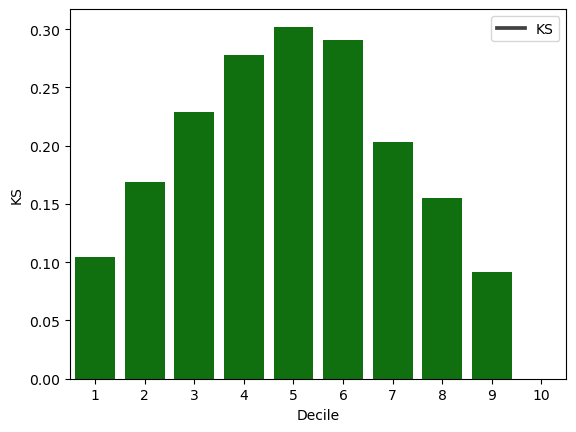

In [351]:
is_ks_maxed = sea.barplot(x = 'Decile', y = 'KS', data = ranked_dataFrame, color = 'green')
is_ks_maxed.legend(['KS'])

In [352]:
dataFrame['Pred_resp_rank'] = np.where(dataFrame['P_Rank_gradBoost'] >= 9, "Top 2", "Remaining 8")
dataFrame['Pred_resp_rank'].value_counts()

Pred_resp_rank
Remaining 8    800
Top 2          200
Name: count, dtype: int64

In [353]:
top2_dataFrame = dataFrame.loc[dataFrame['Pred_resp_rank'] == "Top 2", :]
top2_dataFrame.shape

(200, 29)

In [354]:
top2_dataFrame['Spend_count'] = np.count_nonzero(top2_dataFrame[['NumberOfWineProducts', 'NumberOfFruitProducts', 'NumberOfMeatProducts', 'NumberOfFishProducts', 'NumberOfSweetProducts', 'NumberOfGoldProducts']], axis = 1)
top2_dataFrame['Spend_count'].describe()

count    200.000000
mean       5.125000
std        0.890697
min        2.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        6.000000
Name: Spend_count, dtype: float64

In [355]:
top2_dataFrame['Engagement'] = np.where(top2_dataFrame['Spend_count']<top2_dataFrame['Spend_count'].quantile(0.75), "Low", "High")
top2_dataFrame['Engagement'].value_counts()

Engagement
Low     120
High     80
Name: count, dtype: int64

In [356]:
top2_dataFrame['Total_spend'] = top2_dataFrame['NumberOfWineProducts'] + top2_dataFrame['NumberOfFruitProducts'] + top2_dataFrame['NumberOfMeatProducts'] + top2_dataFrame['NumberOfFishProducts'] + top2_dataFrame['NumberOfSweetProducts'] + top2_dataFrame['NumberOfGoldProducts']
top2_dataFrame['Total_spend'].describe()

count     200.000000
mean      592.680000
std       341.548804
min        10.000000
25%       353.750000
50%       619.000000
75%       787.000000
max      1919.000000
Name: Total_spend, dtype: float64

In [357]:
top2_dataFrame['Spend_levels'] = np.where(top2_dataFrame['Total_spend']<top2_dataFrame['Total_spend'].quantile(0.75), "Low", "High")
top2_dataFrame['Spend_levels'].value_counts()

Spend_levels
Low     149
High     51
Name: count, dtype: int64

In [358]:
import pickle as pk

In [359]:
pk.dump(grad_boost, open("model.pkl", "wb"))